### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [1]:
%matplotlib inline
from scipy import optimize
import numpy as np
import matplotlib.pyplot as pt

In [2]:
tempMax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tempMin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(12)

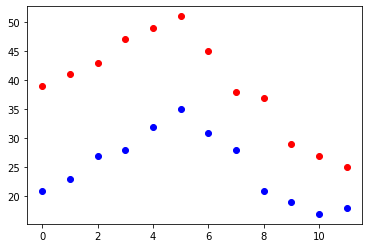

In [3]:
pt.plot(month, tempMax, 'ro')
pt.plot(month, tempMin, 'bo')
pt.show()

In [4]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month, tempMax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month, tempMin, [-40, 20, 0])

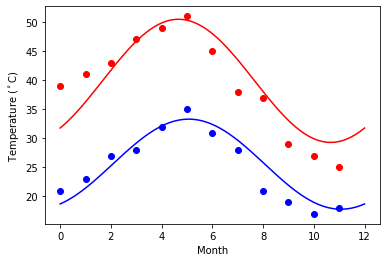

In [5]:
days = np.linspace(0, 12, num=365)

pt.figure()
pt.plot(month, tempMax, 'ro')
pt.plot(days, yearly_temps(days, *res_max), 'r-')
pt.plot(month, tempMin, 'bo')
pt.plot(days, yearly_temps(days, *res_min), 'b-')
pt.xlabel('Month')
pt.ylabel('Temperature ($^\circ$C)')

pt.show()

### Matplotlib:

In [8]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


#### 1. Create a pie chart presenting the male/female proportion

In [9]:
df = pd.DataFrame(titanic['sex'].value_counts())

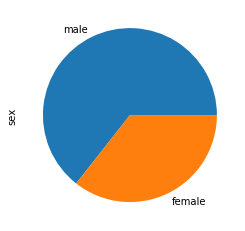

In [10]:
df['sex'].plot.pie()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


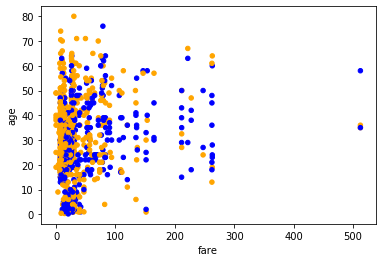

In [25]:
colors = {'male':'orange','female':'blue'}
tt = titanic[['sex','age','fare']].dropna()
tt['sex'].apply(lambda x: colors[x])
tt.plot.scatter(x = 'fare', y = 'age', c = tt['sex'].apply(lambda x: colors[x]))